# 수집한 데이터를 4가지 종류의 회귀 알고리즘에 학습시키고
# rmse값과 함께 시각화한 파일입니다.
## - 4가지 알고리즘: knn / ridge / RandomForest Regressor / GradientBoosting Regressor
## - 최종 선택한 모델: RandomForest Regressor

# 파이프라인

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd

class Model():
    def __init__(self,regressor):
        
        self.model=regressor.fit(x_train, y_train)
        self.prediction=self.model.predict(x_test)
    
    def predict(self,xTest):
        return self.model.predict(xTest)
    
    def rmse(self):
        from sklearn.metrics import mean_squared_error
        print('rmse is ',mean_squared_error(y_test,self.model.predict(x_test))**0.5)
    
    def plotGraph(self):
        from matplotlib import pyplot as plt
        x_values = list(range(len(y_test)))
        y_values_1 = y_test.values
        y_values_2 = self.prediction

        plt.figure(figsize=(100,10))

        plt.plot(x_values, y_values_1,marker='o',label='y_test')
        plt.plot(x_values, y_values_2,marker='o',label='prediction')
        plt.legend()
        plt.show()
        #plt.savefig('sample.png')

# 사용한 데이터

In [22]:
#5100번 버스 
import pandas as pd
from sklearn.model_selection import train_test_split

data=pd.read_csv('./사색역데이터/5100_combined.csv')
data = data.drop(data[(data.station1==1) & (data.arrived!=0)].index)# 이상치 제거
data = data.drop(data[(data.station2==1) & (data.arrived==0)].index)# 이상치 제거
data = data.set_index('시간')
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,1:],data['arrived'],random_state=11,shuffle=True)
print('Train data:',len(x_train),'개');print('Test data:',len(x_test),'개')

Train data: 2604 개
Test data: 868 개


# 모델1-knn

rmse is  206.18435325289065


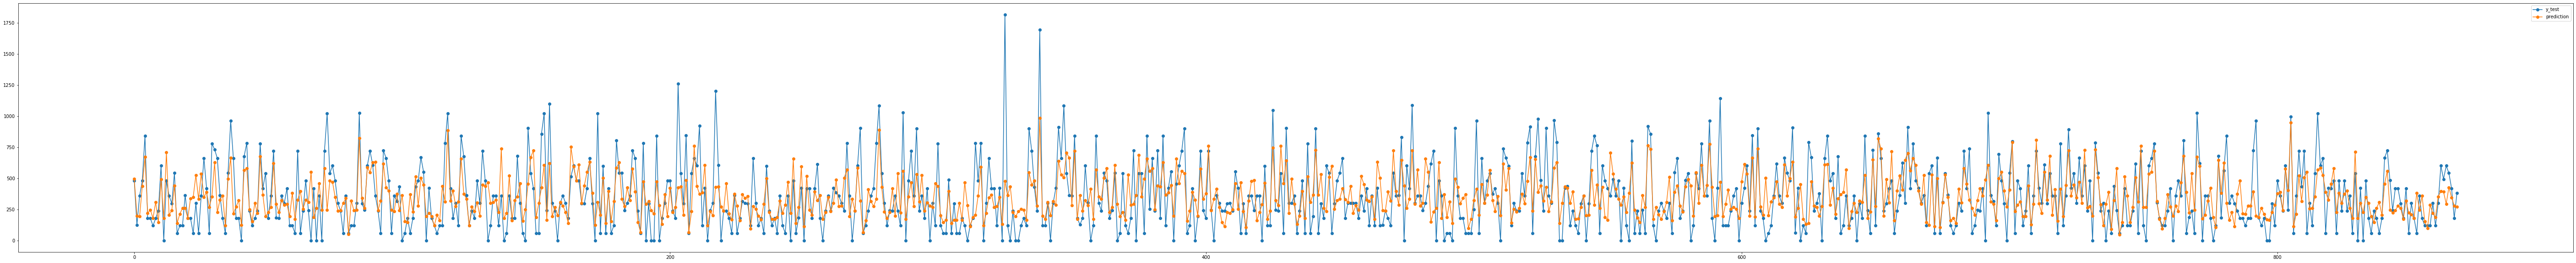

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = Model(KNeighborsRegressor(n_neighbors=9))
knn_model.rmse()
knn_model.plotGraph()


# 모델 2- Ridge

rmse is  215.93450584057445


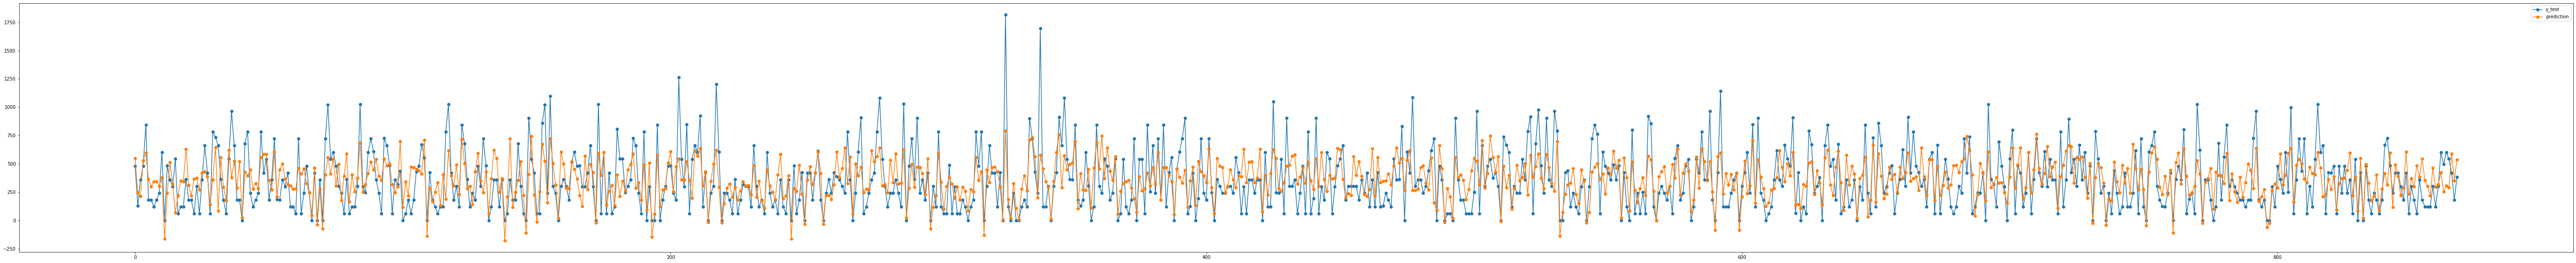

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedKFold,RandomizedSearchCV
import numpy as np

param_grid = {'alpha': np.logspace(-10, 10, 40)}
grid = GridSearchCV(Ridge(), param_grid, cv=RepeatedKFold(10, 5),
                    return_train_score=True)
ridge_model=Model(grid)
ridge_model.rmse()
ridge_model.plotGraph()


# 모델 2의 feature별 중요도

No handles with labels found to put in legend.


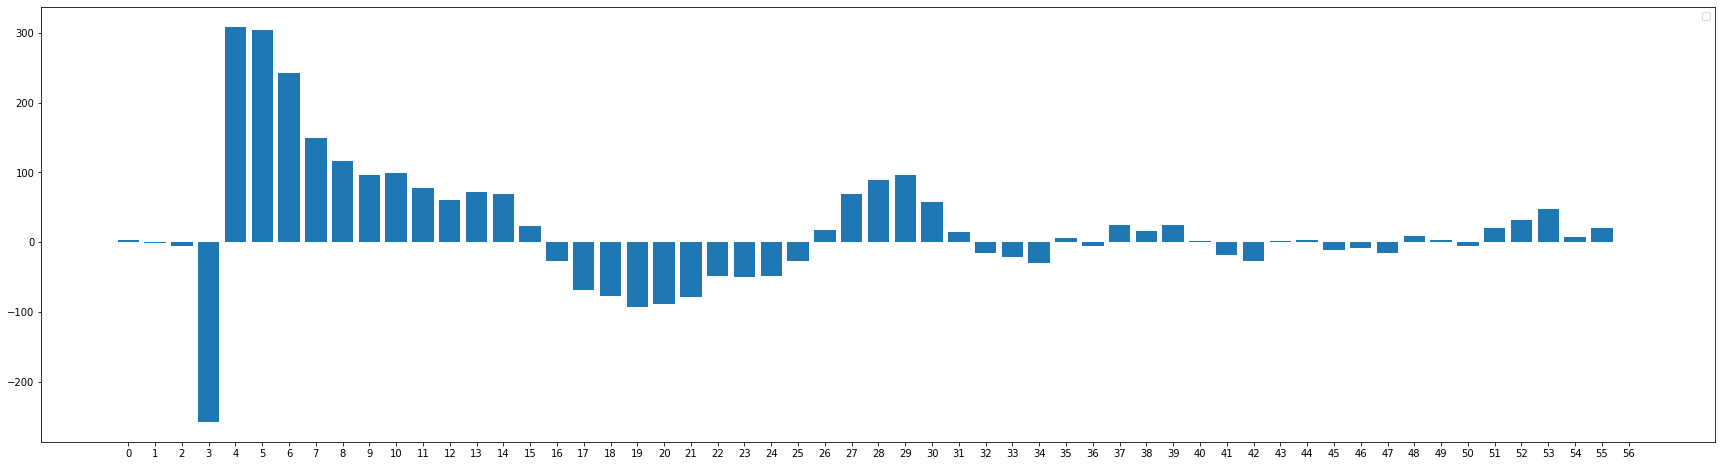

In [25]:
from matplotlib import pyplot as plt

grid.best_params_
importance = grid.best_estimator_.coef_
plt.figure(figsize=(30, 8))
lst=[x for x in range(len(importance))]
plt.bar(lst, importance)
plt.xticks(lst)
plt.legend()
plt.show()

# 모델 3 RandomForest

rmse is  154.87207278129983


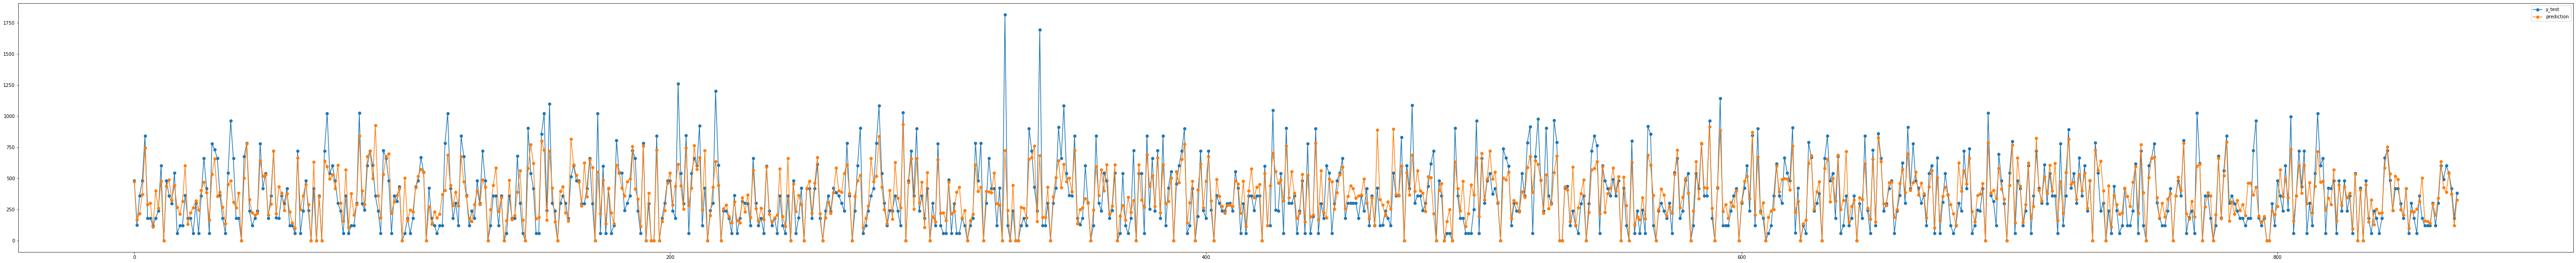

In [26]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=2, shuffle=True)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

params = {
    "n_estimators" : (100, 150, 200)
}

from sklearn.model_selection import GridSearchCV
rf_model = GridSearchCV(rf,
                       param_grid=params,
                       cv = kfold,
                       n_jobs=-1)

rf_model=Model(rf_model)
rf_model.rmse()
rf_model.plotGraph()

# 모델 3의 feature별 중요도

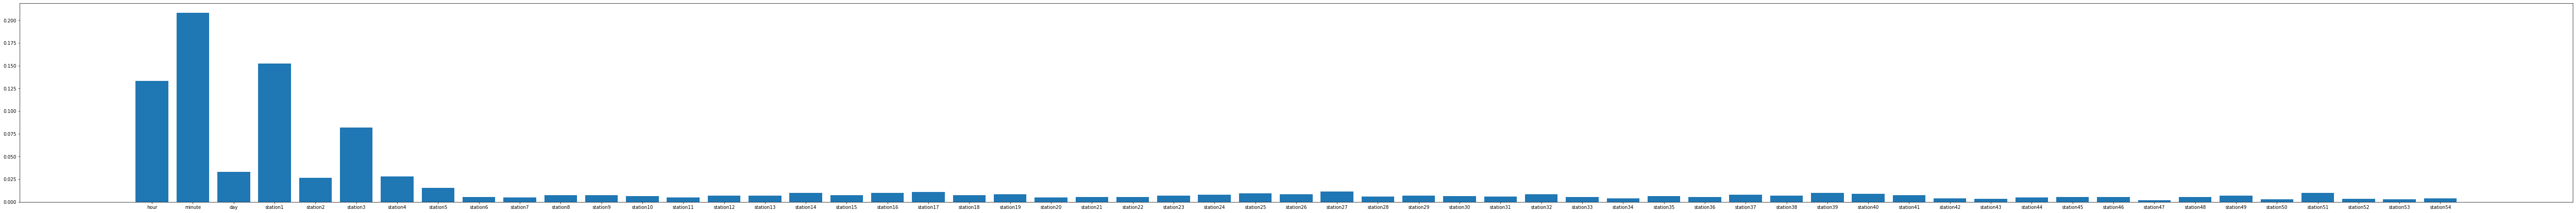

In [27]:
from matplotlib import pyplot as plt

importance = rf_model.model.best_estimator_.feature_importances_
plt.figure(figsize=(100, 8))
lst=x_train.columns
plt.bar(lst, importance)
plt.xticks(lst)
plt.show()


# 모델 4 GradientBoosting Regressor

rmse is  163.8954647596148


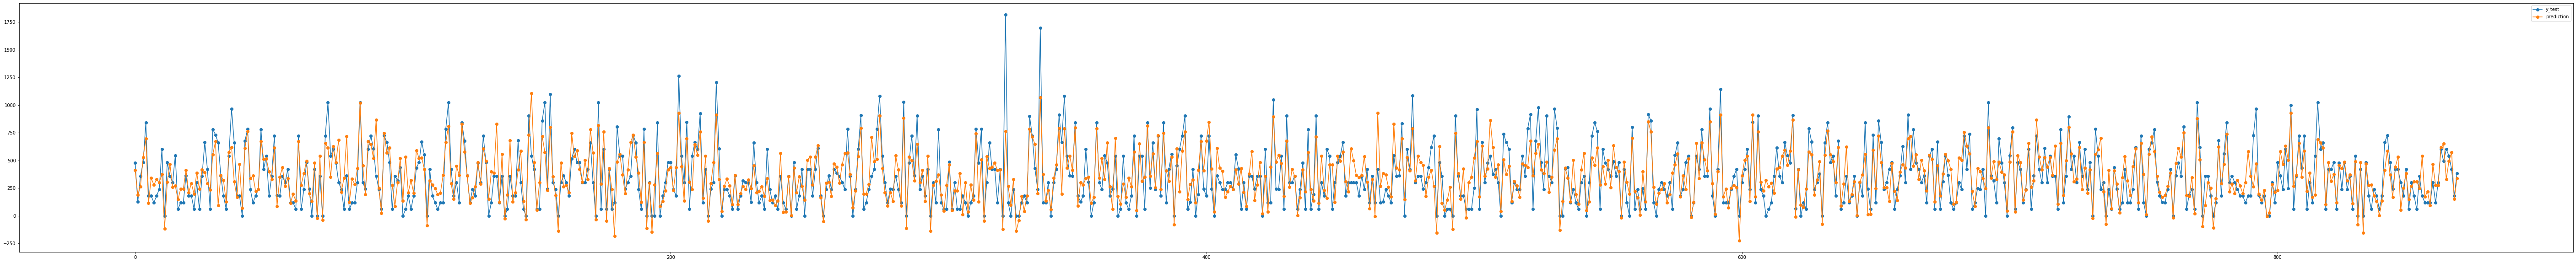

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
# vals=[0.9,0.85,0.8,0.7]
# for v in vals:
#     gbr=GradientBoostingRegressor(max_depth=2,n_estimators=500,learning_rate=0.5,random_state=1,subsample=v)
#     gbr_model=Model(gbr)
#     gbr_model.rmse()
gbr=GradientBoostingRegressor(max_depth=2,n_estimators=500,learning_rate=0.5,subsample=0.85,random_state=1)


gbr_model=Model(gbr)
gbr_model.rmse()
gbr_model.plotGraph()

# 모델 4의 feature별 중요도

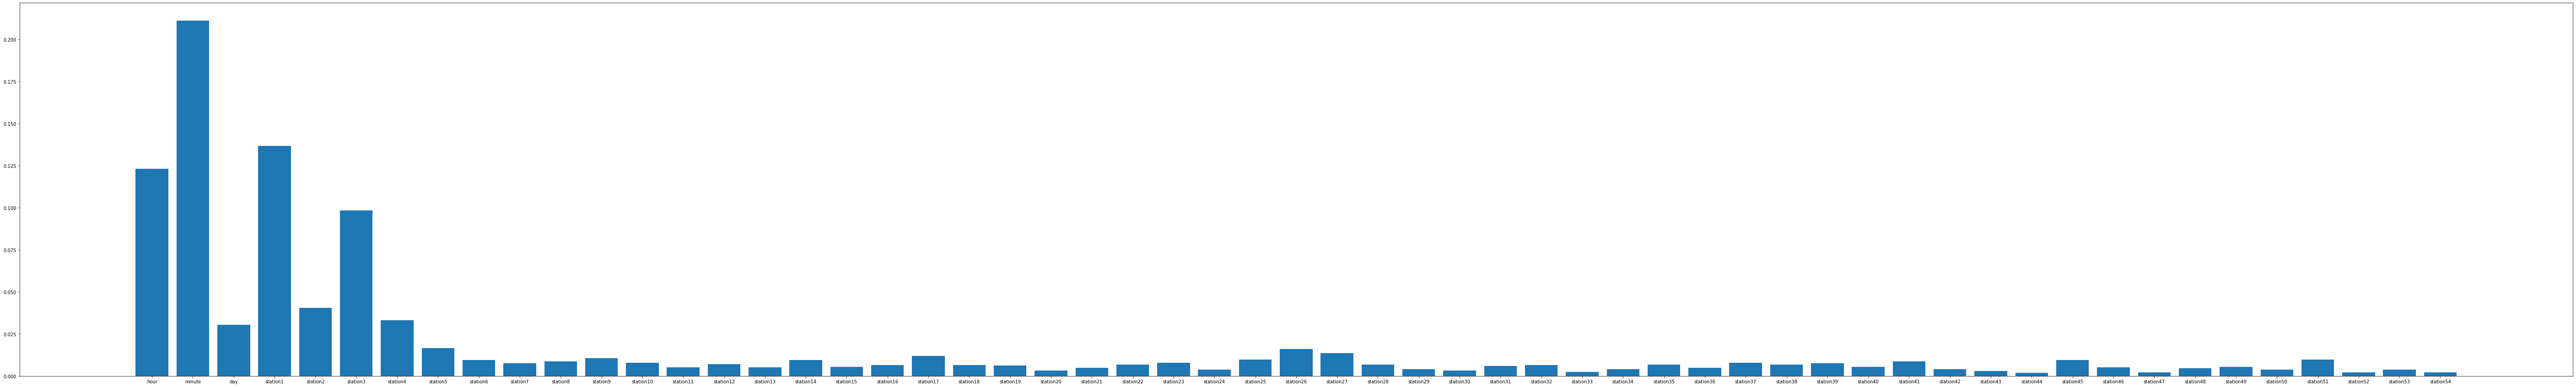

In [29]:
gbr_model.model.feature_importances_
from matplotlib import pyplot as plt

importance = gbr_model.model.feature_importances_
plt.figure(figsize=(100, 15))
lst=x_train.columns
plt.bar(lst, importance)
plt.xticks(lst)
plt.show()